**Covariance** - defines relationship between two variables (X and Y) by measuring how much two variables get changed together. Covariance can range from $+\infty$ to $-\infty$. Higher the number = higher dependency. It is affected by the scale variables are measured in.

$cov(X,Y)$ = $\frac{1}{n-1}\sum_{i=1}^{n}(x_i-\hat{x})(y_i-\hat{y})$

**Correlation** - defines how strongly two variables are related. Can range from $-1$ to $+1$. Is not affected by the scale. Higher the **absolute value** of corr = higher dependency.

_Sample correlation coefficient_: $r = \frac{cov(X,Y)}{\sqrt{var(X)}\sqrt{var(Y)}}$

The guide that Evans (_Evans JD. Straightforward Statistics for the Behavioral Sciences. Brooks/Cole Publishing; Pacific Grove, Calif.: 1996_) suggests for the absolute value of r:
- 0.00 - 0.19 very weak
- 0.20 - 0.39 weak
- 0.40 - 0.59 moderate
- 0.60 - 0.79 strong
- 0.80 - 1.0 very strong

**Covariance** - defines relationship between two variables (X and Y) by measuring how much two variables get changed together. Covariance can range from $+\infty$ to $-\infty$. Higher the number = higher dependency. It is affected by the scale variables are measured in.

$cov(X,Y)$ = $\frac{1}{n}\sum_{i=1}^{n}(x_i-\hat{x})(y_i-\hat{y})$

**Correlation** - defines how strongly two variables are related. Can range from $-1$ to $+1$. Is not affected by the scale. Higher the _absolute value_ of corr = higher dependency.

_Sample correlation coefficient_: $r = \frac{cov(X,Y)}{\sqrt{var(X)}\sqrt{var(Y)}}$

The guide that Evans (_Evans JD. Straightforward Statistics for the Behavioral Sciences. Brooks/Cole Publishing; Pacific Grove, Calif.: 1996_) suggests for the absolute value of r:
- 0.00 - 0.19 very weak
- 0.20 - 0.39 weak
- 0.40 - 0.59 moderate
- 0.60 - 0.79 strong
- 0.80 - 1.0 very strong

In [1]:
import numpy as np

In [2]:
matrix = np.array([[0, 3, 4], [1, 2, 4], [3, 4, 5]]) 
matrix

array([[0, 3, 4],
       [1, 2, 4],
       [3, 4, 5]])

### Covariance example

Example of manual covariance calculation:

Example for the 0th row (**NOTE #1** - in _numpy.cov_ each **row** of m represents a **variable**, and each column a single observation of all those variables).

$\hat{x}=\frac{0+3+4}{3}$ = $\frac{7}{3}$  (~2.3333)

**NOTE #2** - if not specified, by default normalization (False) is by (**N - 1**), where N is the number of observations given (unbiased estimate). If bias is True, then normalization is by N.

$cov(0,0)$ = $\frac{1}{3-1}\sum_{i=1}^{3}(x_i-\hat{x})(y_i-\hat{y})$ = $\frac{1}{2}\sum_{i=1}^{3}(x_i-\hat{x})(x_i-\hat{x})$ = $\frac{1}{2}\sum_{i=1}^{3}(x_i-\hat{x})^2$ = $\frac{1}{2}((0-\frac{7}{3})^2+(3-\frac{7}{3})^2+(4-\frac{7}{3})^2$ = $\frac{1}{2}((-\frac{7}{3})^2+(\frac{2}{3})^2+(\frac{5}{3})^2)$ = $\frac{1}{2}(\frac{49}{9}+\frac{4}{9}+\frac{25}{9})$ = $\frac{1}{2}\frac{78}{9}$ = $\frac{78}{18}$ (~4.333)

In [3]:
np.cov(matrix)

array([[4.33333333, 2.83333333, 2.        ],
       [2.83333333, 2.33333333, 1.5       ],
       [2.        , 1.5       , 1.        ]])

Example when **bias=True** (i.e. denominator is **N** instead of (N-1))

In [4]:
np.cov(matrix, bias=True)

array([[2.88888889, 1.88888889, 1.33333333],
       [1.88888889, 1.55555556, 1.        ],
       [1.33333333, 1.        , 0.66666667]])

In [5]:
# another way of calculating cov matrix - multiplying matrix with it's transposne and dividing by N-1 
from sklearn.preprocessing import StandardScaler

# StandardScaler options - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
matrix_centered = StandardScaler(with_std=False).fit_transform(matrix.T).T
cov2 = np.matmul(matrix_centered, matrix_centered.T)/2
cov2

array([[4.33333333, 2.83333333, 2.        ],
       [2.83333333, 2.33333333, 1.5       ],
       [2.        , 1.5       , 1.        ]])

### Correlation example

Example of manual correlation coeficient calculation:

r for rows 0 (x) and 1 (y):

$r_{xy} = \frac{cov(x,y)}{\sqrt{var(x)\sqrt{var(y)}}}$

$\hat{x} = \frac{0+3+4}{3}=\frac{7}{3}$

$\hat{y} = \frac{1+2+4}{3}=\frac{7}{3}$

$cov(x,y) = \frac{1}{3-1}\sum_{i=1}^{3}((x_0-\hat{x_0})(y_0-\hat{y_0})) = ... = \frac{1}{2}((0-\frac{7}{3})(1-\frac{7}{3})+(3-\frac{7}{3})(2-\frac{7}{3})+(4-\frac{7}{3})(4-\frac{7}{3}))=\frac{1}{2}((-\frac{7}{3}(-\frac{4}{3}))+(\frac{2}{3}(-\frac{1}{3}))+(\frac{5}{3}\frac{5}{3}))=\frac{1}{2}(\frac{28}{9}+\frac{-2}{9}+\frac{25}{9})=\frac{1}{2}\frac{51}{9}=\frac{51}{18}$

(same as _$np.cov(matrix)[0][1]$_)

$var(x) = s^2_x=\frac{(0-\frac{7}{3})^2+(3-\frac{7}{3})^2+(4-\frac{7}{3})^2}{3-1} = \frac{78}{18}$

$var(y) = s^2_y=\frac{(1-\frac{7}{3})^2+(2-\frac{7}{3})^2+(4-\frac{7}{3})^2}{3-1} = \frac{42}{18}$

$r_{xy}=\frac{\frac{51}{18}}{\sqrt{\frac{78}{18}}\sqrt{\frac{42}{18})}}\approx0.89$

In [6]:
# OR

# NOTE "ddof" is parameter for unbiased estimator - “Delta Degrees of Freedom”: the divisor used in the calculation 
# is N - ddof, where N represents the number of elements. By default ddof is zero.
var_x = np.var(matrix[0], ddof=1) 
var_y = np.var(matrix[1], ddof=1)
cov_xy = np.cov(matrix)[0][1]
r_xy = cov_xy/(var_x*var_y)**(1/2)

r_xy

0.8910421112136306

In [7]:
np.corrcoef(matrix)

array([[1.        , 0.89104211, 0.96076892],
       [0.89104211, 1.        , 0.98198051],
       [0.96076892, 0.98198051, 1.        ]])

### Iris dataset example

In [8]:
import pandas as pd
from sklearn import datasets 
import matplotlib.pyplot as plt

iris = datasets.load_iris()
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
cov_data = np.cov(iris.data.T)
cov_data

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [11]:
r = np.corrcoef(iris.data.T) # T so that rows would represent variables and columns - data
r

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [12]:
# OR instead od transposing matrix we can pass rowvar=False, 
# meaning that each column represents a variable, while the rows contain observations
np.corrcoef(iris.data, rowvar=False)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

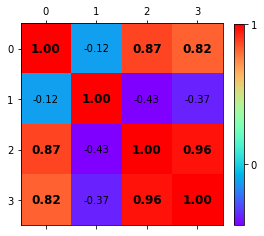

In [13]:
img = plt.matshow(r, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)

# show r values on the heatmap
for i in range(r.shape[0]):
    for j in range(r.shape[1]):
        r_ij = r[i,j]
        if(r_ij>0.59):
            plt.text(i, j, "%0.2f" % r_ij, weight='bold', size=12, ha="center", va="center")  
        else:
            plt.text(i, j, "%0.2f" % r_ij, size=10, ha="center", va="center")
        
plt.show()

### Multicollinearity

Multicollinearity occurs when independent variables are correlated (i.e. dependent on each other). It is a problem in  regression analysis since in regression analysis the regression coeficient represents the mean change in the dependent variable for each 1 unit change in an independent variable **when you hold all of the other independent variables constant**. 